In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.model_selection import StratifiedShuffleSplit

Dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Red Wine Quality

As an individual who has just recently turned 21 I have realized how clueless I am about alcohol. I don't know anything about most alcohols and despite being Italian I know barely anything about red wine. So to expand my knowledge on the subject, what better way to expand my alcoholic palette than to perform an exporative data analysis on a Red Wine Quality data set. The dataset covers various acidity, sugars, chlorides, sulfurdioxide, density, pH, sulphates, alcohol, and finally a quality score.

## I hope to explore:
- How are quality wines different than non quality wines?
- How do different chemical paremeters vary across different wines?
- Are we able to predict the quality of red wine using SVM classification?
This data frame offers so many questions that could potentially be answered. The long list of parameters that are included provide lots of valuable and important information for analysis. How do acidic wines compare to non acidic wines in terms of quality? There is so much potential.

- In this project I hope to uncover important parameters in defining a quality wine.



# Data Pre-Processing

In [49]:
wine = pd.read_csv('winequality-red.csv')
wine['quality_binary']=np.where(wine['quality']>= 6, 1, 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## How quality red wines differ:

In this section I will cover the major differences in chemical parameters between what those deem as quality wines.

In my mind on a ranking scale of 10, average is 5; therefore, I defined a quality wine as one that was rated a 6 or above. From this simple classification we can begin to examine these different parameters.

## Visualizing the spread of quality among red wines.

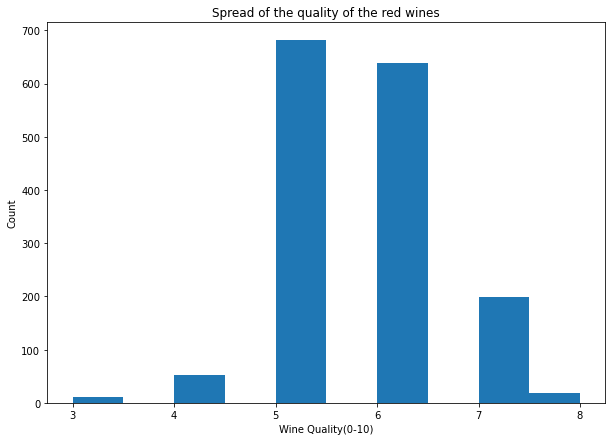

In [50]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(wine.quality, bins = 10)
plt.xlabel("Wine Quality(0-10)")
plt.ylabel("Count")
plt.title('Spread of the quality of the red wines')  
# Show plot
plt.show()

### - Now lets seperate quality wines from unquality wines in two seperate data frames.

In [51]:
quality_wine = wine.loc[wine.quality_binary==1]
unquality_wine = wine.loc[wine.quality_binary==0]

### - Now lets compute means for the two different data frames among each chemical parameter.

In [52]:
print("Means of parameters for quality wines: \n")
print(quality_wine.mean())
print("\nMeans of parameters for unquality wines: \n")
print(unquality_wine.mean())

Means of parameters for quality wines: 

fixed acidity            8.474035
volatile acidity         0.474146
citric acid              0.299883
residual sugar           2.535965
chlorides                0.082661
free sulfur dioxide     15.272515
total sulfur dioxide    39.352047
density                  0.996467
pH                       3.310643
sulphates                0.692620
alcohol                 10.855029
quality                  6.274854
quality_binary           1.000000
dtype: float64

Means of parameters for unquality wines: 

fixed acidity            8.142204
volatile acidity         0.589503
citric acid              0.237755
residual sugar           2.542070
chlorides                0.092989
free sulfur dioxide     16.567204
total sulfur dioxide    54.645161
density                  0.997068
pH                       3.311653
sulphates                0.618535
alcohol                  9.926478
quality                  4.901882
quality_binary           0.000000
dtype: float64


Now these values have a lot of numbers and it is a little hard to interpret how these mean values compare among these two data frames.

### - Now we will compare the means among these two data frames to detirmine which mean values are greater in the quality wines set.

In [53]:
mean_wine=quality_wine.mean()>unquality_wine.mean()
print(mean_wine)

fixed acidity            True
volatile acidity        False
citric acid              True
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates                True
alcohol                  True
quality                  True
quality_binary           True
dtype: bool


From this simple comparison analysis we see that fixed acidity, citric acid, sulphates, and alcohol content are all greater in the deemed "quality" wines. And the other paramteres have values lesser than in the quality wines. Now this really doesn't tell us much. Lets now explore with visualization.

### - Now I want to visualize these parameters compared over boxplots, to evaluate how different these markers really are.
- Box plots are the best tool for visualizing this data as this data frame is strictly numeric, unfortunetaly because it is numeric we can not draw any interesting categorical conclusions. But boxplots summarise numeric data well.

### Starting with Acid properties:

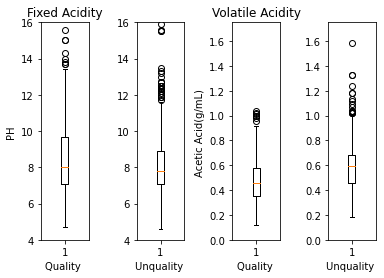

In [54]:
plt.subplot(1, 4, 1)
plt.boxplot(quality_wine['fixed acidity'])
plt.title("Fixed Acidity")
plt.xlabel('Quality ')
plt.ylabel('PH ')
plt.ylim([4, 16])

plt.subplot(1, 4, 2)
plt.boxplot(unquality_wine['fixed acidity'])
plt.xlabel('Unquality ')
plt.ylim([4, 16])


plt.subplot(1, 4, 3)
plt.boxplot(quality_wine['volatile acidity'])
plt.title("Volatile Acidity")
plt.xlabel('Quality ')
plt.ylabel('Acetic Acid(g/mL) ')
plt.ylim([0, 1.75])


plt.subplot(1, 4, 4)
plt.boxplot(unquality_wine['volatile acidity'])
plt.xlabel('Unquality ')
plt.ylim([0, 1.75])

plt.subplots_adjust(wspace=1)
plt.show()

So after viewing these plots of acidity we see that Fixed Acidity in the quality wine is slightly higher than that of an Unquality wine; however, it is not a big enough different to draw any immediate conclusions. On the other hand Volatile Acidity, otherwise known as the amount of Acetic acid in the wine in the unquality wines is noticeably higher than in the quality wines. Leading us to believe that wines with more Acetic acid will produce an unpleasant taste.

### Now with Citric Acid and Residual Sugar properties:

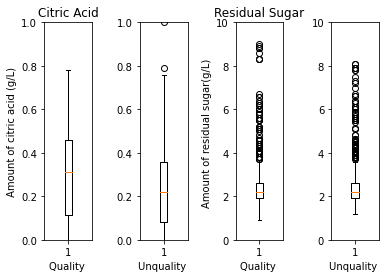

In [55]:
plt.subplot(1, 4, 1)
plt.boxplot(quality_wine['citric acid'])
plt.title("Citric Acid")
plt.xlabel('Quality ')
plt.ylabel(' Amount of citric acid (g/L) ')
plt.ylim([0, 1])

plt.subplot(1, 4, 2)
plt.boxplot(unquality_wine['citric acid'])
plt.xlabel('Unquality ')
plt.ylim([0, 1])


plt.subplot(1, 4, 3)
plt.boxplot(quality_wine['residual sugar'])
plt.title("Residual Sugar")
plt.xlabel('Quality ')
plt.ylabel('Amount of residual sugar(g/L) ')
plt.ylim([0, 10])


plt.subplot(1, 4, 4)
plt.boxplot(unquality_wine['residual sugar'])
plt.xlabel('Unquality ')
plt.ylim([0, 10])

plt.subplots_adjust(wspace=1)
plt.show()

We see among residual sugar box plots that this marker is indescribably similar suggesting that this marker hardly has any effect the quality of a wine. We see mean rather low but lots of extrema going up. However; citric acid tells a more interesting story we see citric acid is slightly higher in the quality wines indicating that citric acid provides a sort of freshness to wine that those deem as quality.

### Now with Free and Total Sulfure Dioxide properties:

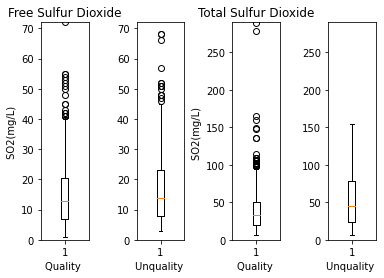

In [56]:
plt.subplot(1, 4, 1)
plt.boxplot(quality_wine['free sulfur dioxide'])
plt.title("Free Sulfur Dioxide")
plt.xlabel('Quality ')
plt.ylabel(' SO2(mg/L) ')
plt.ylim([0, 72])

plt.subplot(1, 4, 2)
plt.boxplot(unquality_wine['free sulfur dioxide'])
plt.xlabel('Unquality ')
plt.ylim([0, 72])


plt.subplot(1, 4, 3)
plt.boxplot(quality_wine['total sulfur dioxide'])
plt.title("Total Sulfur Dioxide")
plt.xlabel('Quality ')
plt.ylabel('SO2(mg/L) ')
plt.ylim([0, 290])


plt.subplot(1, 4, 4)
plt.boxplot(unquality_wine['total sulfur dioxide'])
plt.xlabel('Unquality ')
plt.ylim([0, 290])

plt.subplots_adjust(wspace=1)
plt.show()

In these plots we see that the presence of sulfur dioxide in wine tends to lead to a poor taste. Free Sulfur Dioxide is the SO2 that is unbound to the actually liquid molecules in the wine, and Total SO2 is all of the SO2 in the wine. Both high levels may be considered to have a negative effect on the taste of wine.

### Now with Chlorides and Alcohol properties:

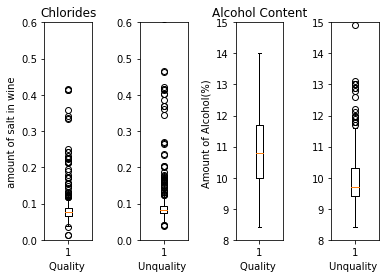

In [57]:
plt.subplot(1, 4, 1)
plt.boxplot(quality_wine['chlorides'])
plt.title("Chlorides")
plt.xlabel('Quality ')
plt.ylabel(' amount of salt in wine ')
plt.ylim([0, 0.6])

plt.subplot(1, 4, 2)
plt.boxplot(unquality_wine['chlorides'])
plt.xlabel('Unquality ')
plt.ylim([0, 0.6])


plt.subplot(1, 4, 3)
plt.boxplot(quality_wine['alcohol'])
plt.title("Alcohol Content")
plt.xlabel('Quality ')
plt.ylabel('Amount of Alcohol(%) ')
plt.ylim([8, 15])


plt.subplot(1, 4, 4)
plt.boxplot(unquality_wine['alcohol'])
plt.xlabel('Unquality ')
plt.ylim([8, 15])

plt.subplots_adjust(wspace=1)
plt.show()

From simple observation we see that unquality wines tended to have more extrema values in chlorides, indicating that saltier wines were favored less in quality. Now if we peer over at Alcohol Content, it is quite obvious that a higher alcohol content is favored. Those wines with a high alcohol content were more likely to be deemed quality.

## Why didnt I graph density, pH, and sulphates?
   - Firstly, density is a product of sugar and alcohol content so by viewing both sugar and alcohol we indirectly viewed density. pH is again a product of the level of base and acidity, and we viewed many acidic properties allready. Finally, sulphates is just a combined Free and Total Sulfure Dioxide analysis, analyzing these seperatly was more interesting.

### Now I want to make a data frame of only the visually significant chemical parameters.

In [58]:
wine_sig=wine.drop(['density', 'pH','sulphates','fixed acidity','residual sugar'], axis = 1)
wine_sig.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,quality,quality_binary
0,0.70,0.00,0.076,11.0,34.0,9.4,5,0
1,0.88,0.00,0.098,25.0,67.0,9.8,5,0
2,0.76,0.04,0.092,15.0,54.0,9.8,5,0
3,0.28,0.56,0.075,17.0,60.0,9.8,6,1
4,0.70,0.00,0.076,11.0,34.0,9.4,5,0


## Now we can examine the signifcant markers more closely
- Here I ran a simple group by quality to examine the means of significant markers.

In [59]:
sig_mean=wine_sig.groupby(['quality_binary']).mean()
sig_mean

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,quality
quality_binary,,,,,,,
0,0.589503,0.237755,0.092989,16.567204,54.645161,9.926478,4.901882
1,0.474146,0.299883,0.082661,15.272515,39.352047,10.855029,6.274854


## Examining Extrema
 - At first I was interested in examining the maximum values of each of these categories.

In [60]:
sig_max=wine_sig.groupby(['quality_binary']).max()
sig_max

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,quality
quality_binary,,,,,,,
0,1.58,1.00,0.611,68.0,155.0,14.9,5
1,1.04,0.78,0.415,72.0,289.0,14.0,8


Now at first this was interesting because a lot of these max values seemed to condradict our visual suggestions on whether high or low paremters produced more quality wines.

## So I will now look at top 5 highest values and bottom 5 lowest values of each parameter.

### Volatile Acid

In [61]:
vol_acid_large=wine_sig.nlargest(5, ['volatile acidity'])[['volatile acidity','quality_binary']]
vol_acid_small=wine_sig.nsmallest(5, ['volatile acidity'])[['volatile acidity','quality_binary']]

print("Top 5 values for volatile acid: \n", vol_acid_large.head())
print("\nLowest 5 values for volatile acid: \n", vol_acid_small.head())

Top 5 values for volatile acid: 
       volatile acidity  quality_binary
1299             1.580               0
126              1.330               0
127              1.330               0
672              1.240               0
690              1.185               0

Lowest 5 values for volatile acid: 
       volatile acidity  quality_binary
948               0.12               1
949               0.12               1
950               0.12               1
1286              0.16               1
1566              0.16               1


What is so interesting about this is all of the top 5 volatile acid entries all were deemed unquality wines, meanwhile all the 5 lowest volatile acid entries were deemed quality wines.

### Citric Acid 


In [62]:
cit_acid_large=wine_sig.nlargest(5, ['citric acid'])[['citric acid','quality_binary']]
cit_acid_small=wine_sig.nsmallest(5, ['citric acid'])[['citric acid','quality_binary']]

print("Top 5 values for citric acid: \n", cit_acid_large.head())
print("\nLowest 5 values for citric acid: \n", cit_acid_small.head())

Top 5 values for citric acid: 
       citric acid  quality_binary
151          1.00               0
353          0.79               0
1574         0.78               1
258          0.76               0
395          0.76               1

Lowest 5 values for citric acid: 
    citric acid  quality_binary
0          0.0               0
1          0.0               0
4          0.0               0
5          0.0               0
7          0.0               1


Now this is a little harder to interpret; however, we see that only one of the lowest entries with 0 citric acid was considered quality. Suggesting that citric acid is an important component in red wine; however, not too much.

### Chlorides


In [63]:
chl_large=wine_sig.nlargest(5, ['chlorides'])[['chlorides','quality_binary']]
chl_small=wine_sig.nsmallest(5, ['chlorides'])[['chlorides','quality_binary']]

print("Top 5 values for chlorides: \n", chl_large.head())
print("\nLowest 5 values for chlorides: \n", chl_small.head())

Top 5 values for chlorides: 
      chlorides  quality_binary
258      0.611               0
151      0.610               0
106      0.467               0
81       0.464               0
692      0.422               0

Lowest 5 values for chlorides: 
       chlorides  quality_binary
836       0.012               1
837       0.012               1
695       0.034               1
797       0.038               1
1571      0.038               1


Super interesting again we see none of the high chloride entries were deemed quality, contrasting all of the low value chlorides who were deemed quality. Salty wines will never be considered quality.

### Free Sulfur Dioxide

In [64]:
fSO2_large=wine_sig.nlargest(5, ['free sulfur dioxide'])[['free sulfur dioxide','quality_binary']]
fSO2_small=wine_sig.nsmallest(5, ['free sulfur dioxide'])[['free sulfur dioxide','quality_binary']]

print("Top 5 values for free sulfur dioxide: \n", fSO2_large.head())
print("\nLowest 5 values for free sulfur dioxide: \n", fSO2_small.head())

Top 5 values for free sulfur dioxide: 
       free sulfur dioxide  quality_binary
1244                 72.0               1
396                  68.0               0
400                  68.0               0
1558                 66.0               0
1131                 57.0               0

Lowest 5 values for free sulfur dioxide: 
      free sulfur dioxide  quality_binary
530                  1.0               1
535                  1.0               1
773                  1.0               1
774                  2.0               1
36                   3.0               1


Again among all of the lowest entries of free sulfur dioxide we see that all of them are deemed quality, when among the highest entries only one of them is deemed quality. Leading me to believe low free S02 indicates a quality wine.

### Total Sulfur Dioxide

In [65]:
tSO2_large=wine_sig.nlargest(5, ['total sulfur dioxide'])[['total sulfur dioxide','quality_binary']]
tSO2_small=wine_sig.nsmallest(5, ['total sulfur dioxide'])[['total sulfur dioxide','quality_binary']]

print("Top 5 values for total sulfur dioxide: \n", tSO2_large.head())
print("\nLowest 5 values for total sulfur dioxide: \n", tSO2_small.head())

Top 5 values for total sulfur dioxide: 
       total sulfur dioxide  quality_binary
1081                 289.0               1
1079                 278.0               1
354                  165.0               1
1244                 160.0               1
651                  155.0               0

Lowest 5 values for total sulfur dioxide: 
      total sulfur dioxide  quality_binary
915                   6.0               1
979                   6.0               0
984                   6.0               0
813                   7.0               0
986                   7.0               1


Again an interesting trend almost opposing what we saw in the Free sulfur dioxide model that wines with a high total sulfur dioxide level were deemed quality, while only a few of the lowest total sulfur dioxide entries were deemed quality.

### Alcohol

In [66]:
alc_large=wine_sig.nlargest(5, ['alcohol'])[['alcohol','quality_binary']]
alc_small=wine_sig.nsmallest(5, ['alcohol'])[['alcohol','quality_binary']]

print("Top 5 values for alcohol: \n", alc_large.head())
print("\nLowest 5 values for alcohol: \n", alc_small.head())

Top 5 values for alcohol: 
      alcohol  quality_binary
652     14.9               0
142     14.0               1
144     14.0               1
467     14.0               1
588     14.0               1

Lowest 5 values for alcohol: 
       alcohol  quality_binary
517       8.4               0
544       8.4               1
1436      8.5               0
371       8.7               1
528       8.7               1


Unfortunatly, the extrema in the alcohol percentage scenario does not provide much insight into the data. It does appear that generally higher percentage alcohol content is more regularly deemed quality.

# Exploratory Conclusion
Now after performing this analysis, as a 21 year old I feel much more equiped to handle red wine and speak informativly about it. I am only kidding, I don't think this analysis transitioned into anything practical. However, it was very interesting to observe properties of wine that may detirmine to what extent a wine is deemed quality. In this project we detirmined that volatile acidity, citric acid, chlorides, free sulfur dioxide, total sulfur dioxide, and alcohol were effective detirminents of quality of wine. Less effective detirminents seemed to be fixed acidity and residual sugar. It was difficult to detirmine what marker was most effective at detirmining a quality of wine without running a regression; however, if I had to guess visually it appears that alcohol had a strong seperation. This data is perfect to perform a classification calculation on which is what I'll be doing now. Though it was not perfect, I believe now chemically we understand much better what makes a wine quality.

# SVM Classification

### More Data Preprocessing and Feature Engineering for Support Vectors

In [67]:
wine_sig=wine_sig.drop(['quality'], axis = 1)
y=wine_sig.loc[:,'quality_binary']
x=wine_sig
x=x.drop(['quality_binary'], axis = 1)
x.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol
0,0.70,0.00,0.076,11.0,34.0,9.4
1,0.88,0.00,0.098,25.0,67.0,9.8
2,0.76,0.04,0.092,15.0,54.0,9.8
3,0.28,0.56,0.075,17.0,60.0,9.8
4,0.70,0.00,0.076,11.0,34.0,9.4


## Modeling and Accuracy Evaluation

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [69]:
Kernel= ["linear", "poly","rbf","sigmoid"]
for kernel in Kernel:
    clf=SVC(kernel=kernel,
           gamma="auto",
           degree=1,
           cache_size=5000).fit(x_train,y_train)
    print("The prediction accuracy under kernel %s is %f" % (kernel, clf.score(x_test,y_test)))

The prediction accuracy under kernel linear is 0.759375
The prediction accuracy under kernel poly is 0.746875
The prediction accuracy under kernel rbf is 0.737500
The prediction accuracy under kernel sigmoid is 0.537500


##### The prediction accuracy under linear kernel is 75.9%, thats fairly accurate.

In [71]:
svmcl = SVC(kernel="linear",gamma=0.03, coef0=0.0, C=0.03, probability= True)
svmcl.fit(x_train, y_train)
pred_test=svmcl.predict(x_test)
print("Test Accuracy: ", metrics.accuracy_score(y_test, pred_test))

Test Accuracy:  0.715625


# SVM Classification Conclusion

Linear, Poly, and RBF kernel performed rather well in the SVM classification. This means that using all the significant markers included using either the linear kernel or the poly kernel the SVM model would be able to accurately predict, up to 75.9% of the time, whether a wine is deemed quality or not. Some other methods we could potentially employ are KNN or Random Forest. To improve I would explore several other models to detirmine accuracy but it appears this SVM model is a great predictor.